# Datenexploration und Cleaning

In [1]:
import ipywidgets as widgets
import sys
from IPython.display import display
from IPython.display import clear_output

In [2]:
def create_multipleChoice_widget(description, options, correct_answer):
    if correct_answer not in options:
        options.append(correct_answer)
    
    correct_answer_index = options.index(correct_answer)
    
    radio_options = [(words, i) for i, words in enumerate(options)]
    alternativ = widgets.Box(
        [
            widgets.RadioButtons(
                options = radio_options,
                layout={'width': 'max-content'},
                description = '',
                disabled = False
            )
        ]
    )
    
    description_out = widgets.Output()
    with description_out:
        print(description)
        
    feedback_out = widgets.Output()

    def check_selection(b):
        a = int(alternativ.children[0].value)
        if a==correct_answer_index:
            s = '\x1b[6;30;42m' + "Richtig." + '\x1b[0m' +"\n" #green color
        else:
            s = '\x1b[5;30;41m' + "Falsch. " + '\x1b[0m' +"\n" #red color
        with feedback_out:
            clear_output()
            print(s)
        return
    
    check = widgets.Button(description="Absenden")
    check.on_click(check_selection)
    
    
    return widgets.VBox([description_out, alternativ, check, feedback_out])
    

In [3]:
Q1 = create_multipleChoice_widget(
    'Die Variablen Land (Deutschland, Frankreich, Schweden) und Fläche (in Quadratkilometer) sind',
    ['beide kategorisch','beide numerisch','numerisch und kategorisch', 'kategorisch und numerisch', 'kategorisch nominal und kategorisch ordinal'],
    'kategorisch und numerisch')
Q2 = create_multipleChoice_widget(
    'Die Variablen Monat (Januar, Februar, März) und monatlicher Umsatz (in Euro) sind',
    ['beide kategorisch','beide numerisch','numerisch und kategorisch', 'kategorisch und numerisch', 'kategorisch nominal und kategorisch ordinal'],
    'kategorisch und numerisch')
Q3 = create_multipleChoice_widget(
    'Die Variablen Wasserverbrauch (Liter pro Tag) und Hausgröße (in m^2) sind',
    ['beide kategorisch','beide numerisch','numerisch und kategorisch', 'kategorisch und numerisch', 'kategorisch nominal und kategorisch ordinal'],
    'beide numerisch')
Q4 = create_multipleChoice_widget(
    'Der Wasserverbrauch von 250 Haushalten wurde in niedrig, mittel und hoch eingestuft und die Hausgröße in klein, mittel und groß. Die Variablen Wasserhaushalt und Hausgröße sind in diesem Fall',
    ['beide kategorisch','beide numerisch','numerisch und kategorisch', 'kategorisch und numerisch', 'kategorisch nominal und kategorisch ordinal'],
    'beide kategorisch')

In [4]:
bQ1 = create_multipleChoice_widget(
    'Welche Aussage trifft zu?',
    [
        '50% der Passagiere sind mit Eltern oder Kinder gereist',
        '25% der Passagiere sind mit Eltern oder Kinder gereist',
        'die meisten Passagiere (> 75%) sind nicht mit Eltern oder Kinder gereist'
    ],
    'die meisten Passagiere (> 75%) sind nicht mit Eltern oder Kinder gereist')
bQ2 = create_multipleChoice_widget(
    'Welche Aussage trifft zu?',
    [
        '50% der Passagiere sind mit Ehepartner oder Geschwister gereist',
        '25% der Passagiere sind mit Ehepartner oder Geschwister gereist',
        'die meisten Passagiere (> 75%) sind mit Ehepartner oder Geschwister gereist'
    ],
    '25% der Passagiere sind mit Ehepartner oder Geschwister gereist')


Ziele:
* Einen ersten Eindruck von den Daten gewinnen  
* Grundlegendes Verständnis der Daten 
* Grundlegende Statistiken erheben und visualisieren
* Fehlende Daten ermitteln
* Umgang mit fehlenden Daten

## Überblick verschaffen

Zunächst werden die Bibliotheken und Daten geladen.

Um die Techniken zu erklären wird das Datenset "Titanic" verwendet. Die Techniken werden im Anschluss auf dem Datenset "Bike Buyers" angewendet.

#### Das Datenset Titanic

<div><img src="./pics/titanic.jpeg" style="width: 400px; float: left; margin-top: 10px; margin-right: 10px;"/></div>
<div style="font-size: 7px; float: left;">Quelle: https://de.wikipedia.org/wiki/RMS_Titanic#/media/Datei:RMS_Titanic_3.jpg</div>


<div style="font-size: 14px; float: left;">Der Untergang der Titanic ist eines der berüchtigtsten Schiffsunglücke der Geschichte.

Am 15. April 1912, während ihrer Jungfernfahrt, sank die weithin als "unsinkbar" geltende RMS Titanic nach der Kollision mit einem Eisberg. Unglücklicherweise gab es nicht genügend Rettungsboote für alle an Bord, was zum Tod von 1502 der 2224 Passagiere und der Besatzung führte.

Obwohl das Überleben auch ein gewisses Glückselement beinhaltete, scheint es, dass einige Gruppen von Menschen eher überlebten als andere.

Die Aufgabe des Datensets lautet: Erstellen eines Vorhersagemodell, das die Frage beantwortet: "Welche Arten von Menschen überlebten mit größerer Wahrscheinlichkeit?" unter Verwendung von Passagierdaten (d. h. Name, Alter, Geschlecht, sozioökonomische Klasse usw.).</div>

#### Python Module importieren

In [5]:
import pandas as pd
import numpy as np

#### Daten laden

In [6]:
data = pd.read_csv("./data/titanic/train.csv")

FileNotFoundError: [Errno 2] File ./data/titanic/train.csv does not exist: './data/titanic/train.csv'

#### Anzeigen der ersten Datensätze

In [7]:
data.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


Beobachtungen aus den ersten Datensätzen:
* bei den Merkmalen Alter und Kabine fehlen Werte (NaN)
* einige der Merkmale sind nicht numerisch
* Merkmale unterscheiden sich teils stark in den Wertebereichen

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Das Datenset besteht aus 891 Datensätzen, 11 Merkmalen und der Zielvariable (survived). Zwei der Merkmale sind vom Typ Float, 5 sind Integer und 5 sind Objekte.

Beschreibung der Merkmale:
* PassengerId: Eindeutige Id eines Passagiers
* Survived: Das Schiffsunglück überlebt ( 1 oder 0, für ja oder nein)
* Pclass: Ticketklasse
* Name: Passagiername
* Sex: Geschlecht
* Age: Alter
* SibSp: Geschwister oder Ehepartner mit an Board der Titanic
* Parch: Eltern oder Kinder an Board der Titanic
* fare: Ticketpreis
* Cabin: Kabinennummer
* Embarked: Ort des Zustiegs

Datentypen

Numerische Daten (wenn man den Mittelwert berechnen kann)

- Diskrete Daten (wenn man es zählen kann)
- Kontinuierliche Daten (wenn man es messen kann, Länge, Gewicht, Temperatur etc.)

Kategorische Daten
- Nominale Daten (wenn man es benennen kann, z.B. Farbe: rot, blau)
- Ordinale Daten (wenn man es ordnen kann)

Categorical data in numerischer Form:
- Hausnummern,
- Telefonnummern
- Geburtsdatum
- Postleitzahlen

#### Numerische und nicht-numerische Daten

Numerische Daten:
* Diskret
    * Sibsp
    * Parch
* Kontinuierlich
    * Age
    * Fare

Kategorische Daten:
* Nominal
    * PassengerId
    * Name
    * Ticket
    * Cabin
    * Survived
    * Sex 
    * Embarked
* Ordinal
    * Pclass

##### Wissen testen

In [9]:
display(Q1)
display(Q2)
display(Q3)
display(Q4)

#### Grundlegende deskriptive Statistiken

In [10]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Fakten aus den einfachen deskriptiven Statistiken:
* 38% der Passagiere im Datenset haben überlebt
* Das Alter der Passagiere variiert zwischen 0,4 und 80 Jahren.
* 75% der Passagiere haben weniger als 31,00 bezahlt  
* 25% der Passagiere haben mehr als 31,00 bezahlt
* der durchschnittliche Ticketpreis beträgt 32
* 25% der Passagiere hatten Ehepartner oder Geschwister an Board


#### Wissen testen

In [11]:
display(bQ1)
display(bQ2)

#### Fehlende Werte ermitteln

Die meisten Machine Learning-Algorithmen können nicht mit fehlenden Werten umgehen. Die Daten müssen daher auf fehlende Daten geprüft und modifiziert werden. Möglicher Umgang mit fehlenden Werten:

##### 1. Datensätze entfernen
Diese Methode wird sehr häufig verwendet, wenn eine ausreichende Menge an Daten vorliegen. Zeilen, die fehlende Werte enthalten werden entfernt. 

In [12]:
data_tmp = data.dropna()
data_tmp.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

##### 2. Ersetzen durch Mittelwert/Median/Mode

Kann angewendet werden, wenn es sich um ein Merkmal mit numerischen Daten handelt. Der Mittelwert, Median oder Mode des Merkmals wird berechnet und die fehlenden Werte mit dem berechneten Wert ersetzt. Es handelt sich bei dieser Methode um eine Annäherung mittels einem statistischen Ansatz. Eine weiter Möglichkeit ist die berechnung des Durchschnitts der Nachbarwerte. Dieses Vorgehen funktioniert besser, wenn die Daten linear sind. 

Beim Mode-Wert handelt es sich um den am häufigsten vorkommenden Wert. Der Median, ist das 50%-Quantil und sollte verwendet werden, wenn die Verteilung der Daten rechts- oder linksschief ist.


In [13]:
data['Age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [14]:
data['Age'].mean()

29.69911764705882

In [15]:
data['Age'].replace(np.NaN, data['Age'].mean()).head(10)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

Alternativ: Berechnung des Median oder Mode-Wert

In [16]:
data['Age'].median()

28.0

In [17]:
data['Age'].mode()

0    24.0
dtype: float64

##### 3. Eine eigene Kategorie zuweisen

Diese Methode kann bei kategorischen Daten angewendet werden. Für die fehlenden Werte wird eine eigene Kategorie erstellt wie z.B. "Unbekannt" und die fehlenden Werte mit dieser Bezeichnung ersetzt.

In [18]:
data['Cabin'].head(10)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [19]:
data['Cabin'].fillna('Unbekannt').head(10)

0    Unbekannt
1          C85
2    Unbekannt
3         C123
4    Unbekannt
5    Unbekannt
6          E46
7    Unbekannt
8    Unbekannt
9    Unbekannt
Name: Cabin, dtype: object

##### 4. Die fehlenden Werte schätzen

Unter Verwendung der Merkmale, bei denen keine fehlenden Werte vorkommen, können die fehlenden Werte mit Hilfe von Machine Learning Algorithmen geschätzt werden. Im Folgenden ein Beispiel mit Linearer Regression die fehlenden Werte des Merkmals Alter zu ersetzten:

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

data_uncleaned = data[['PassengerId', 'Pclass', 'Survived', 'SibSp', 'Parch','Fare', 'Age']].dropna()
data_cleaned = data_uncleaned.dropna()

# Alle Merkmale bis auf das Alter
train_x = data_cleaned.iloc[:,:6]

# Nur das Alter
train_y = data_cleaned.iloc[:,6]

# Trainieren mit den vorhandenen Daten
model.fit(train_x, train_y)

# 
test_x = data_uncleaned.iloc[:,:6]
age_predicted= pd.DataFrame(model.predict(test_x))

# nur die fehlenden Werte ersetzen
data_uncleaned.Age.fillna(age_predicted.iloc[0], inplace=True)

In [21]:
data_uncleaned['Age'].head(10)

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
Name: Age, dtype: float64

##### Welche Methode sollte verwendet werden?

Finden Sie heraus warum die Daten fehlen:

Häufig erhalten wir die Daten und haben diese nicht selbst aufgezeichnet. Wir können daher nicht sicher sagen, warum die Daten fehlen. Meist lässt sich dies schätzen. Stellen Sie sich die Frage  

**"Fehlt der Wert weil er nicht aufgezeichnet wurde oder weil er nicht existiert"?**

Wenn ein Wert fehlt, weil er nicht existiert macht es keinen Sinn den Wert zu schätzen. In diesem Fall ist es besser den Datensatz (die Zeile) zu verwerfen oder die Lücke mit einem "Nicht vorhanden" (NaN)-Wert zu belegen. 

Fehlt ein Wert weil er nicht aufgezeichnet wurde, macht es Sinn diesen zu schätzen. Entweder durch statistische Analyse der restlichen Werte in der Spalte oder durch Machine Learning Algorithmen unter Verwendung der anderen Spalten.

##### Anwendung am Bespiel Datenset Titanic

Ausgabe der Anzahl fehlender Werte pro Merkmal:

In [22]:
missingValuesCount = data.isnull().sum()
total = missingValuesCount.sort_values(ascending=False)
percent = (missingValuesCount/data.isnull().count()*100).sort_values(ascending=False)
missingData = pd.concat([total, percent], axis=1, keys=['Gesamt', 'Prozent'])
missingData

,Gesamt,Prozent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


Beobachtungen:
* Der Großteil (77,1%) der Kabinen-Werte (Cabin) fehlen, entspricht 687 Datensätze
* 19,9% der Altersangaben fehlen, entspricht 177 Datensätze
* 0,2% der Zustiegsorte (Embarked) fehlen, entspricht nur 2 Datensätze

**Zustiegsorte (Embarked)**  
Jeder der Passagiere hatte einen Zustiegsort. Bedeutet, die fehlenden Werte existieren, wurden jedoch nicht erfasst.In diesem Fall macht es Sinn die Daten zu schätzen. 

Da es sich bei den fehlenden Zustiegsorten lediglich um 2 Datensätze handelt, können diese einfach mit den häufigsten Werten aufgefüllt werden. 

In [23]:
data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [24]:
data['Embarked'].fillna('S', inplace=True)

**Alter (Age)**  
Jeder Passagier hat ein Alter. Die fehlenden Werte existieren, wurden jedoch nicht erfasst. Eine Schätzung macht auch in diesem Fall Sinn.

Das fehlende Alter kann zunächst mit Mittelwert oder Median ersetzt werden. Insbesondere wenn viele Ausreißer enthalten sind oder die Verteilung rechts- oder linksschief ist, eignet sich der Median. Sieht man sich die Verteilung der Daten an (siehe Diagramm unten), zeigt sich eine rechtsschiefe Verteilung. In diesem Fall eignet sich der Median besser als der Mittelwert. 

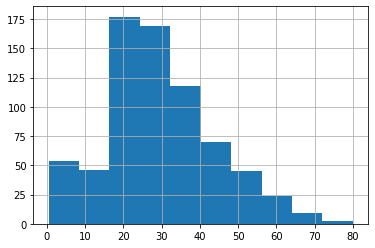

In [25]:
data['Age'].hist()

In [26]:
data['Age'].median()

28.0

In [27]:
data['Age'].fillna(data['Age'].median(), inplace=True)

In [28]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

**Kabine (Cabin)**

In [29]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Aufgrund der sehr hohen Anzahl an fehlendenen Kabinen-Werten (77,1%) und der Annahme, dass der Kabinenname vermutlich wenig darüber aussagt, ob ein Passagier überlebt hat, wird die Spalte Kabine aus den Daten entfernt.


In [30]:
drop_column = ['Cabin']
data.drop(drop_column, axis=1, inplace = True)

#### Entfernen von nicht relevanten Merkmalen

Bei den Merkmalen PassengerId, Name und Ticket wird angenommen, das es sich um zufällige eindeutige Identifikatoren handelt, die keinen Einfluss auf die Ergebnisvariable haben. Daher werden sie von der Analyse ausgeschlossen.

In [31]:
drop_column = ['PassengerId','Ticket','Name']
data.drop(drop_column, axis=1, inplace = True)

In [32]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C
